# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [74]:
import pandas as pd
import matplotlib
import math
%matplotlib inline 

df = pd.read_csv('data/human_body_temperature.csv')

In [75]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


***1. Is the distribution of body temperatures normal?***
---

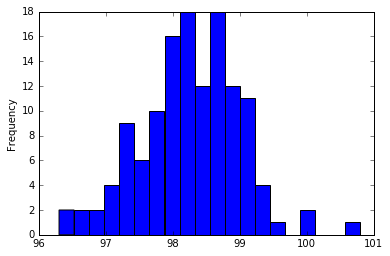

In [5]:
df1 = df['temperature']
df1.plot.hist(bins = 20)

I am testing normality by plotting the body temperature data as a histogram. The data should be bell-shaped and resemble the normal distribution.

**The data appears to satisfy this critera and is approx. normal.**

***2. Is the sample size large? Are the observations independent?***
---

In [21]:
print '# of observations =', len(df)

# of observations = 130


**Large sample size** because there are more than 30 observations. 

According to information about the data contains **130 distinct observations.**

***3. Is the true population mean really 98.6 degrees F?***
---

   Null Hypothesis (H0) :  Mean of Temp. = 98.6
   
   Alternative Hypothese (HA) :  Mean of Temp.  != 98.6
   
   *Alpha = .05*

In [36]:
sample_mean = df1.mean()
population_mean = 98.6
sample_std = df1.std()
n = 130

t = (sample_mean - population_mean) / (sample_std / (math.sqrt(n)) )

print 't statistic = ',t, sample_mean, sample_std

t statistic =  -5.45482329236 98.2492307692 0.733183158039


With an **Alpha = .05**, the t statistic of the distribution must be within **1.979** standard devations of the popoulation mean to accept the null hypothesis according to the t-table.

    The sample mean in this example is 5.45 standard devations away.

Therefore we reject the null hypothesis that the mean temperature is 98.6 and accept the alternative hypothesis.

Use a **one sample test** because you are not comparing the difference between two populations but rather trying to make observations about the population test statistic from the sample. 

Will use a **t-test** because although there are more than 30 observations and therefore the data can be considered to be normally distributed the popoulation standard deviation is unknown.

z-Test:

In [30]:
sample_mean = df1.mean()
population_mean = 98.6
population_std = df1.std()
n = 130

z = (sample_mean - population_mean) / (population_std)

print 'z statistic = ',z

z statistic =  -0.478419651247


With the z statistic the threshold for accepting the null hypothesis with 
an alpha of .05 is 1.96 standard deviations from the mean. 

    The sample mean in this example is .47 standard deviations away with the z statistic. 
    
Therefore, we will accept the null hypothesis that the mean temperature is 98.6 using the z statistic. 

***4. At what temperature should we consider someone's temperature to be "abnormal"?***
---

Calculating the Confidence Interval and Margin of Error:

with Alpha = .05; t-score = 1.979 

    In other words: According to the t table with 129 degress freedom, 95% of the probability will be contained within 1.979 standard deviations from the mean. 

In [40]:
t = 1.979
n = 130
sample_mean = df1.mean()
sample_std = df1.std()

margin_of_error = t * (sample_std / math.sqrt(n))
CI = [(sample_mean - margin_of_error), (sample_mean + margin_of_error)]

print 'Margin of Error =', margin_of_error
print 'Confidence Interval:', CI

Margin of Error = 0.127258440922
Confidence Interval: [98.12197232830859, 98.37648921015297]


Through conducting this confidence interval, **we are 95% confident that a person's average temperature lies within the interval of 98.12 and 98.37.**

**This means that if someone has a temperature out of this range, we could be reasonably confident that this could be considered abnormal.**


***5. Is there a significant difference between males and females in normal temperature?***
---

In [85]:
f = df[df.gender == 'F'].temperature
m = df[df.gender == 'M'].temperature

print 'Mean Female Temperature =', f.mean()
print 'Mean Male Temperature =', m.mean()

Mean Male Temperature = 98.1046153846
Mean Female Temperature = 98.3938461538


In [89]:
dim = f.mean() - m.mean()

print 'Difference in Means=', dim

Difference in Means= 0.289230769231


**Difference of Sample Means Hypothesis Test:**

Null Hypothesis (H0) :  Mean Female Temp. - Mean Male Temp. = 0

Alternative Hypotheses (HA) : Mean Female Temp. - Mean Male Temp. != 0

*alpha = .05*

Using the t table, the t-score for an alpha = .05 and 129 degrees of freedom is **1.979**.

In [95]:
#calculating the standard deviation of the difference of two sample means

f_std = f.std()
m_std = m.std()

n_f = len(f)
n_m = len(m)

std_dim = math.sqrt((f_std**2/n_f) + (m_std**2/n_m))
std_dim 

0.12655395041982642

The critical region for significance on either end of the distribution is:

    The standard deviation (above) times * t-value (1.979)

In [101]:
t_val = 1.979

print 'Above', (std_dim * t_val)
print 'Or Below', -(std_dim * t_val)
print ''
print 'Sample Difference in Means =', dim

Above 0.250450267881
Or Below -0.250450267881

Sample Difference in Means = 0.289230769231


The Sample differnce in means lies above the critical region of significance even while assuming that the null hypothesis is true.

**We reject the null hypothesis that there is no difference between male and female temperatures.** There is a statistically significant difference between the average temperature of males and females.

I used a Hypothesis Test for the difference of means because we want to compare the difference between two sample means to determine if a difference that is statistically significant exists. 

The answer provided by this test, that there is a difference between males and females average termperature alludes that the 98.6 F statistic may be more nuanced than orgianlly thought.

If males and females have statistically significant differences in thier average temperatures, it does not make sense to continue to group the two genders into one statistic. Rather, the statistic should be updated to reflect these new findings.